In [1]:
import pickle

In [2]:
from keras.models import Sequential

In [3]:
from tensorflow.keras import layers

In [4]:
import pickle
X = pickle.load(open('X.pkl','rb'))
y = pickle.load(open('y.pkl','rb'))

In [5]:
X = X/255

In [6]:
model = Sequential()

In [7]:
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [8]:
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [9]:
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [10]:
model.add(layers.Flatten())

In [11]:
model.add(layers.Dense(128,input_shape = X.shape[1:], activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

In [12]:
model.add(layers.Dense(2, activation = 'softmax'))

In [13]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_model=model.fit(X, y, epochs=30 , validation_split = 0.1)

Epoch 1/30
704/704 [==============================] - 409s 552ms/step - loss: 0.5977 - accuracy: 0.6695 - val_loss: 0.4894 - val_accuracy: 0.7708
Epoch 2/30
704/704 [==============================] - 344s 489ms/step - loss: 0.4693 - accuracy: 0.7753 - val_loss: 0.4543 - val_accuracy: 0.7796
Epoch 3/30
704/704 [==============================] - 338s 480ms/step - loss: 0.3940 - accuracy: 0.8228 - val_loss: 0.4059 - val_accuracy: 0.8152
Epoch 4/30
704/704 [==============================] - 336s 477ms/step - loss: 0.3327 - accuracy: 0.8524 - val_loss: 0.4037 - val_accuracy: 0.8140
Epoch 5/30
704/704 [==============================] - 335s 475ms/step - loss: 0.2742 - accuracy: 0.8828 - val_loss: 0.3743 - val_accuracy: 0.8388
Epoch 6/30
704/704 [==============================] - 333s 473ms/step - loss: 0.2072 - accuracy: 0.9160 - val_loss: 0.4167 - val_accuracy: 0.8384
Epoch 7/30
704/704 [==============================] - 413s 586ms/step - loss: 0.1531 - accuracy: 0.9400 - val_loss: 0.4470 -

In [15]:
score = model.evaluate(X, y, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.1454075574874878
Test accuracy: 0.978600025177002


In [20]:
import matplotlib.pyplot as plt

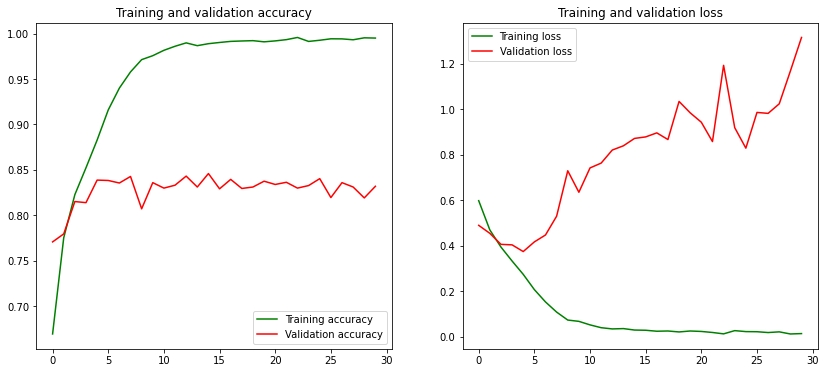

In [21]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)